In [192]:
# Step 1 - import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [193]:
# Step 2 - Read the data as a data frame and print the first 10 rows
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [194]:
# Step 3 - EDA Analysis
# a. Shape of the Data
data.shape

# Tells us that there are 1338 rows with 7 features

(1338, 7)

In [195]:
# b. Data Type of Each Attribute
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

1. This tells us the data type for each feature; we can check this to ensure certain numerical features have the right data type e.g. here we want to ensure Age, BMI, Children and Charges are Int or Float (tells me there are no data points in these rows which are non-numbers otherwise pandas would have categorized these are Object)

2. Smoker, Region and Sex are text hence these should be objects

In [196]:
# c. Checking the presense of missing values
data[data.isna().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


1. There are no null values in the dataframe otherwise it would have shown.

2. Let me showcase my understanding of the line above - data.isna() -- this is the main function which checks for na, then .any(axis=1) compares this to any value in the entire DF across all columns and puttint this back into a data frame means wherever this is true it would show up.

In [197]:
# d. 5 Point of Summary of Numerical Attributes
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Describe function brings up the 5 point summary of all the numerical features in the data frame. If I list down describe(include='all') then even text variables are described.

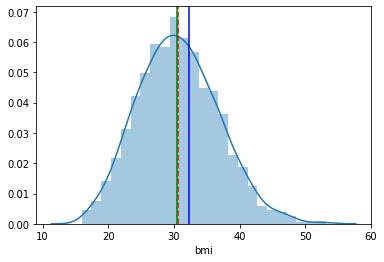

In [198]:
# e.  Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
sns.distplot(data['bmi'])
mean=data['bmi'].mean() # calculate mean
median=data['bmi'].median() # calculate median
mode=data['bmi'].mode()[0] # calculate mode
plt.axvline(mean, color='r', linestyle='--') # plot red line as mean
plt.axvline(median, color='g', linestyle='-') # plot green line as median
plt.axvline(mode, color='b', linestyle='-') # plot blue line as mode

BMI shows a normal distribution which at a deeper inspection shows that there is a slight left skew as Mode > Mean which is approximately equal to Median.

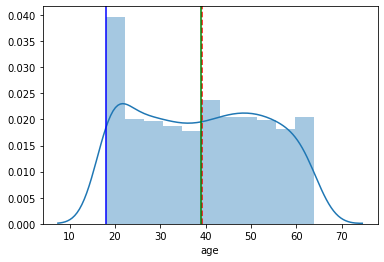

In [199]:
sns.distplot(data['age'])
mean=data['age'].mean() # calculate mean
median=data['age'].median() # calculate median
mode=data['age'].mode()[0] # calculate mode
plt.axvline(mean, color='r', linestyle='--') # plot red line as mean
plt.axvline(median, color='g', linestyle='-') # plot green line as median
plt.axvline(mode, color='b', linestyle='-') # plot blue line as mode

Age shows a non-normal distribution; mean and median are almost equal whereas mode is now on the extreme left

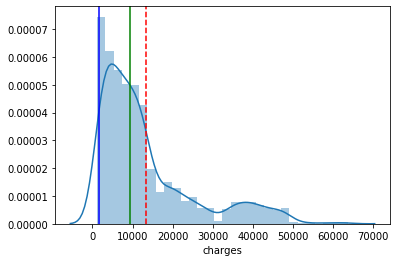

In [200]:
sns.distplot(data['charges'])
mean=data['charges'].mean() # calculate mean
median=data['charges'].median() # calculate median
mode=data['charges'].mode()[0] # calculate mode
plt.axvline(mean, color='r', linestyle='--') # plot red line as mean
plt.axvline(median, color='g', linestyle='-') # plot green line as median
plt.axvline(mode, color='b', linestyle='-') # plot blue line as mode

Charges also show a non-normal distribution and are right skewed

In [201]:
# f.  Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns

bmiSkew = data['bmi'].skew().round(2)
ageSkew = data['age'].skew().round(2)
chargesSkew = data['charges'].skew().round(2)

print(f'Skewness for BMI is {bmiSkew}')
print(f'Skewness for Age is {ageSkew}')
print(f'Skewness for Charges is {chargesSkew}')

Skewness for BMI is 0.28
Skewness for Age is 0.06
Skewness for Charges is 1.52


1. BMI - Symettrical distribution as the values are between -0.5 to 0.5 
2. Age - Fairly symettrical distribution skew as the values are between -0.5 to 0.5 (but this one is interesting as the skewness as a metric is giving an incorrect picture here the distribution tells another story). 
3. Charges - Highly skewed distribution >1 or <-1; value here is 1.52

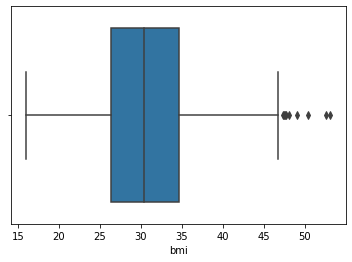

In [202]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns 
# we can use boxplot to visually see outlier outside both the whiskers

sns.boxplot(data['bmi'])

There are dots outside the 100% whisker which indicates that there are outliers in the data

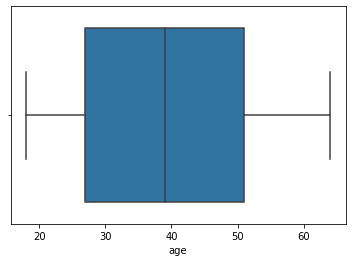

In [203]:
sns.boxplot(data['age'])

No outliers present

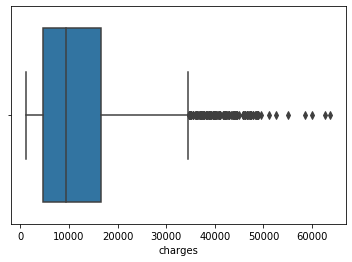

In [204]:
sns.boxplot(data['charges'])

Again the presense of outliers in charges

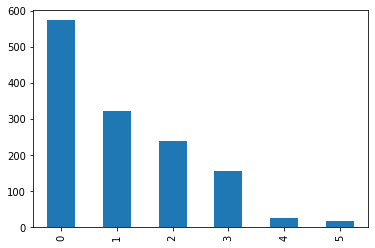

In [205]:
# h. Distribution of categorical columns (include  children) - smoker, region, sex and children

data['children'].value_counts().plot.bar()

#Most people have no children, if we have to call this out as a distribution it is left skewed.

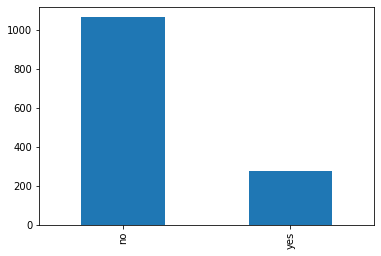

In [206]:
data['smoker'].value_counts().plot.bar()

# There are more number of non-smokers and very few smokers

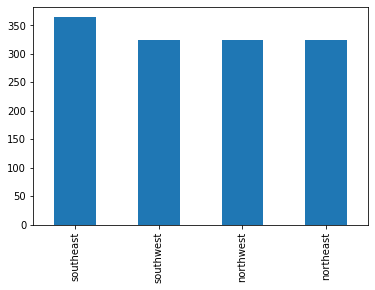

In [207]:
data['region'].value_counts().plot.bar()

# Across the regions the count of people is equally distributed.

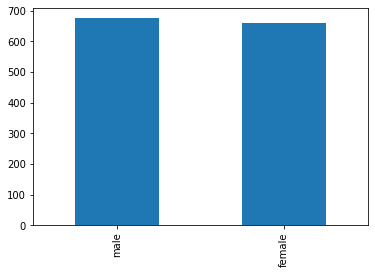

In [208]:
data['sex'].value_counts().plot.bar()

# There is the same proportion of male and female population

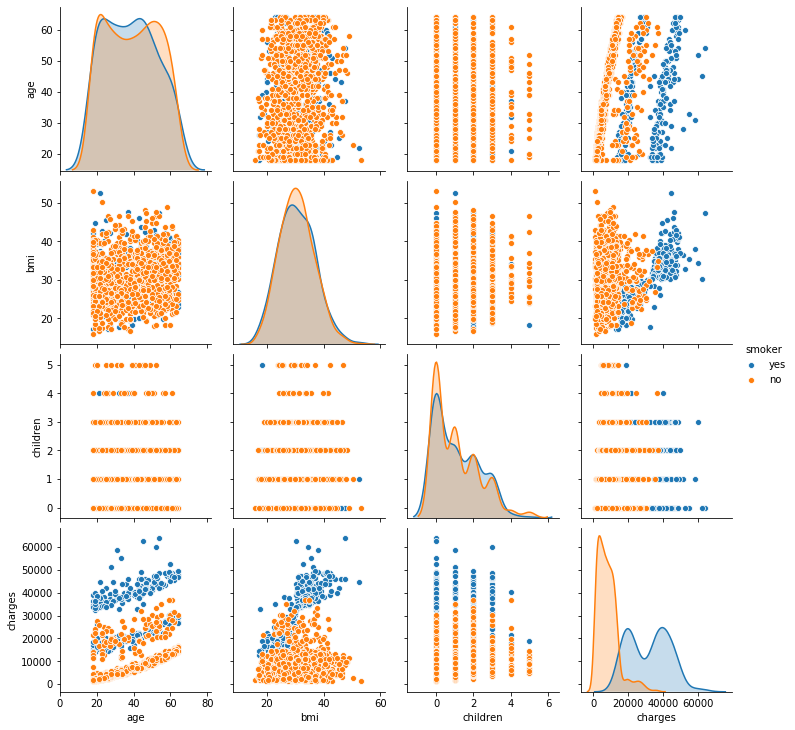

In [209]:
# i. Pair plot that includes all the columns of the data  frame
sns.pairplot(data, hue = 'smoker')

Charges have a significant differentiation for smokers and non-smokers and this is visible across the board. It could also be a good variable for prediction.

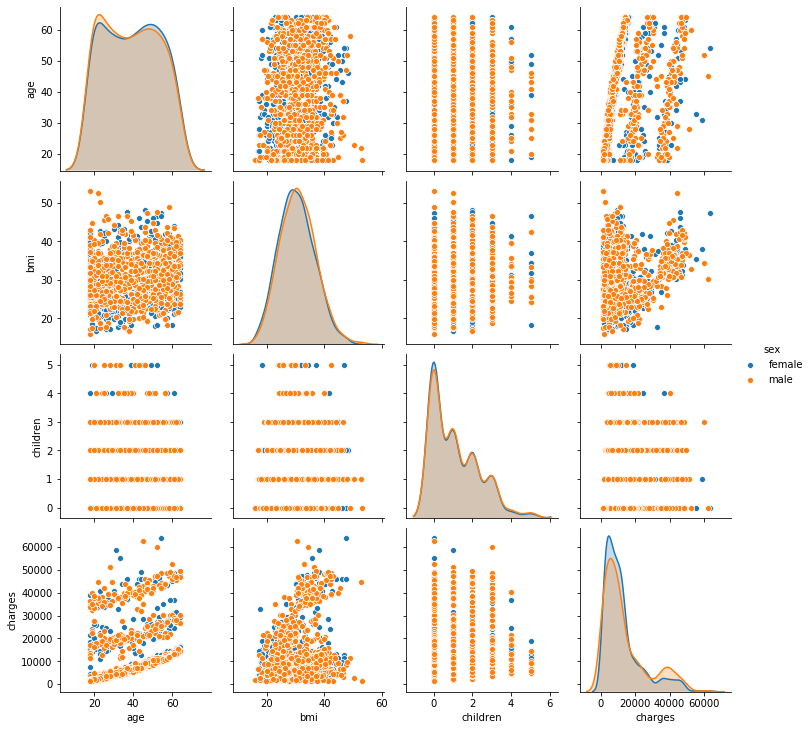

In [210]:
sns.pairplot(data, hue = 'sex')

There is no variation in any age, bmi, children and charges for male or female; it is the same. There are significant call outs here.

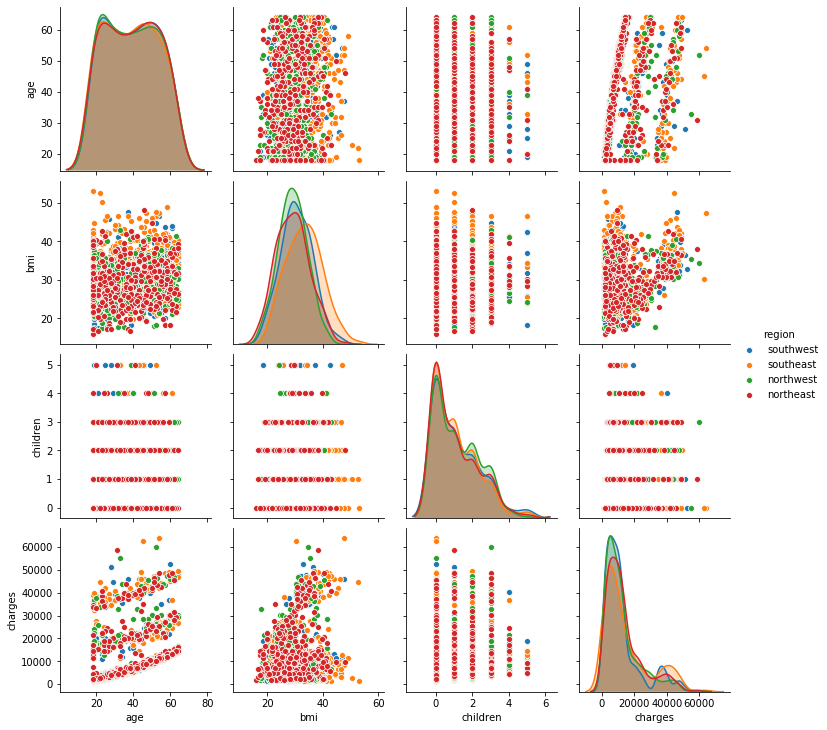

In [211]:
sns.pairplot(data, hue = 'region')

Same for region - there is no signficant call outs.

In [212]:
# Answer the following questions with statistical evidence  
# a. Do charges of people who smoke differ significantly from the people who don't?  

# We can do an independent T-Test to estimate the difference between both the groups

smokerYes = data[data['smoker'] == 'yes']
smokerNo = data[data['smoker'] == 'no']

t, p_value = stats.ttest_ind(smokerYes['charges'], smokerNo['charges'])

print(p_value)

8.271435842177219e-283


P Value < 0.05 which indicates there is a significant difference in the charges paid by both the categories (smokers and non-smokers).

If null hypothesis was that 'Charges don't different significantly' then we can reject the null hypothesis and accept the alternate hypothesis that the 'Charges differ significantly'.

Interesting this to note is that this conclusion we could also draw visually by looking at the pair plot above where for smokers and non-smokers it showed a different distribution of charges.

In [213]:
# 4.b. - Does bmi of males differ significantly from that of  females? 

# we will again use independent t-test

bmiMale = data[data['sex'] == 'male']
bmiFemale = data[data['sex'] == 'female']

t, p_value = stats.ttest_ind(bmiMale['bmi'], bmiFemale['bmi'])

print(p_value)

0.08997637178984932


In this case we acceept the Null Hypothesis.

Null - There is no significant difference between the BMI for Male and Female

Alternate - There is a significant difference between the BMI for Male and Female

The p_value is > 0.05 (significance level) indicating that the BMI for both male and female does not show significant difference. We accept the Null Hypothesis

In [214]:
# 4.c. Is the proportion of smokers significantly different in different genders?

totalMale = data[data['sex'] == 'male'].count()['smoker']
totalFemale = data[data['sex'] == 'female'].count()['smoker']

smokerMale = data[(data['smoker'] == 'yes') & (data['sex'] == 'male')].count()['smoker']
smokerFemale = data[(data['smoker'] == 'yes') & (data['sex'] == 'female')].count()['smoker']

print(f'Total Males are {totalMale} with {smokerMale} as smokers i.e. Ratio of {round(smokerMale/totalMale,2)}')
print(f'Total Females are {totalFemale} with {smokerFemale} as smokers i.e. Ratio of {round(smokerFemale/totalFemale,2)}')

Total Males are 676 with 159 as smokers i.e. Ratio of 0.24
Total Females are 662 with 115 as smokers i.e. Ratio of 0.17


In [215]:
# Different proportions exists as proved up, but lets now prove are they statisitically different
# Now let's check significant difference using ztest

stat, p_value = proportions_ztest([smokerFemale, smokerMale] , [totalFemale, totalMale])
print(p_value)

0.005324114164320532


The value is < 0.05 which basically means we will reject the Null Hypothesis; proportion of smokers in male and female population are not equal

Null - Proportion of smokers in male and female population are equal

Alternate - Proportion of smokers in male and female population are not equal



In [216]:
# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same ? 

# we will use ANNOVA to compare distribution across two or more variables, in this case it would be three.

# H0: All pairs of samples are same i.e. all sample means are equal
# H1: At least one pair of samples is significantly different

womenNoChildBMI = data[(data['children'] == 0) & (data['sex'] == 'female')]['bmi']
womenOneChildBMI = data[(data['children'] == 1) & (data['sex'] == 'female')]['bmi']
womenTwoChildBMI = data[(data['children'] == 2) & (data['sex'] == 'female')]['bmi']

stats.f_oneway(womenNoChildBMI, womenOneChildBMI, womenTwoChildBMI)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

p value > 0.05 which means we accept the null hypothesis BMI for all samples is the same.